In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libs.utils import EXPERIMENT

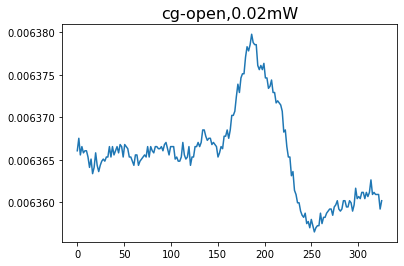

In [2]:
EX = EXPERIMENT('cg',1,'open',20)
EX.plot_power()

([<matplotlib.lines.Line2D at 0x215d8ebfb50>],)

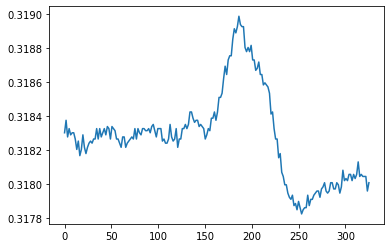

In [3]:
plt.plot(EX.positions,EX.I/EX.I0),